<a href="https://colab.research.google.com/github/sgr1118/GD-NLP-Theory/blob/main/GD7_Seq2Seq_and_Attention(221007).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7-1. 들어가며

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-1.max-800x600.jpg)
<center></center>

문장을 토큰화하고 의미를 부여하는 과정은 멋지고 중요한 일이지만 조금은 지루할 수 있죠. 그 과정을 견디고 여기까지 오신 여러분, 고생하셨습니다!

이번 코스에서는 언어 모델이 발전해 온 과정에 대해 개략적으로 공부하고, NLP의 큰 흐름 중 하나인 Sequence to Sequence(Seq2seq) 에 대해 살펴볼 것입니다. 이를 발전시키기 위한 기법이자 지금은 없어선 안 될 중요한 메커니즘인 Attention에 대해서도 최초의 아이디어가 생겨난 시점에서부터 자세히 살펴보려고 합니다. 부디 즐거운 시간이 되시길 바랍니다!

-----------------------------------------------------------

1. 학습 목표

- 언어 모델이 발전해 온 과정을 개략적으로 파악한다.
- 기존 RNN 기법이 번역에서 보인 한계를 파악하고, 이를 개선한 Seq2seq를 이해한다.
- Seq2seq를 발전시킨 Attention에 대해 알아본다.

-----------------------------------------------------------
2. 학습 내용
- 우리가 만드는 언어 모델
- Sequence to Sequence 문제
- Sequence to Sequence 구현
- Attention! (1) Bahdanau Attention
- Attention! (2) Luong Attention
- 미래의 기법들
- 마무리


# 7-2. 우리가 만드는 언어 모델

언어 모델(Language Model)이란, 주어진 단어들을 보고 다음 단어를 맞추는 모델입니다. 더 자세하게는, 단어의 시퀀스를 보고 다음 단어에 확률을 할당 하는 모델이다.

좀 더 수학적으로 표현하자면, 언어 모델은 n-1개의 단어 시퀀스 w1,...,wn-1가 주어졌을 때, n번쨰 단어 wn으로 무엇이 올지를 예측하는 확률 모델로 표현됩니다. 파라미터 θ로 모델링하는 언어 모델을 다음과 같이 표현할 수 있습니다.

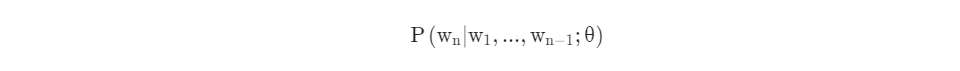

하지만 나중에는 꼭 시퀀스 형태의 Next Token Prediction 언어모델이 아니더라도, 주변 단어를 보고 중심 단어를 예측하는 형태로 언어모델을 구성하는 것도 보시게 될 것입니다.







1. 통계적 언어 모델 (Statistical Language Model)

딥러닝이 등장하기 이전엔 통계적 언어 모델(Statistical Language Model) 의 사용이 지배적이었습니다. 대표적으로 2000년대 초반까지 구글이나 네이버의 번역기는 모두 통계적 언어 모델을 기반으로 하고 있었죠. 통계적 언어 모델의 이모저모를 배우기 위해 아래 웹페이지를 방문해 보세요.

[언어모델](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/09/16/LM/)

Q1. 위 글에서 설명하는 언어 모델은 충분한 데이터가 없다면 범용적인 모델을 구축하기 어렵습니다. 그 이유에 대해 간단히 적어보세요.
- 한 번도 본 적 없는(학습 데이터에 존재하지 않는) 단어 / 문장에 대해서는 확률을 부여할 수 없다. 따라서 언어 모델이 아우르는 범위를 넓히기 위해 다양한 단어를 포함하는 데이터가 필요하다. (양까지 충분하다면 정의하는 확률이 일반적이므로 더욱 좋다.)

2. 신경망 언어 모델 (Neural Network Language Model)

통계적 언어 모델의 단점을 개선한 것이 우리가 배울 신경망 언어 모델(Neural Network Language Model, 이하 NNLM) 입니다. NNLM의 시초는 Feed-Forward 신경망 언어 모델인데, 지금의 Embedding 레이어의 아이디어인 모델입니다. 아래 웹피이지를 참고하자

[피드 포워드 신경망 언어 모델(NNLM)](https://wikidocs.net/45609)

Q2. 위 글에서 설명하는 희소문제(sparsity problem)에 대해 간단히 설명해 보세요.
- 희소 문제란, 모델이 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링 할 수 없는 문제를 말한다. 한 번도 관측하지 못한 데이터에 대해선 0에 확률을 부여한다는 것에서 문제가 발생한다.

Q3. 원-핫 입력이 투사층을 거쳐가는 것은 해당 행을 읽어오는 것과 동일하다는 데에서 붙여진 이름은 무엇인가요?
- 룩 업 테이블(Lookup Table)

Q4. 출력 층에서 사용되는 활성함수 Softmax는 어떤 의미를 갖나요?
- 소프트맥스 함수를 거쳐 나온 0-1 사이 값은 해당 인덱스에 대한 확률을 의미한다.

단어를 어떤 Embedding으로 표현할 수 있다는 것은 어떤 이점을 가지고있나? 단순 유사도 비교를 넘어서는 활용 사례를 아래 영상에서 확인

[유튜브 영상](https://youtu.be/gUMvBRI-WGo)

각 단어를 일련의 Embedding 벡터로 표현한 후, 이전의 몇 개 단어를 활용해 다음 단어를 예측하는 것은 분명 많은 문제를 해결했습니다. 특히 단어 간의 유사도를 표현할 수 있게 되어 문장의 유창성이 높아진 것은 혁신적이었죠!

하지만 예측에 정해진 개수의 단어만 참고한다는 분명한 한계가 있었습니다. 예를 들어 번역문을 생성하려면 문장이 짧을 수도, 길 수도 있으니, n개의 단어를 참고하기보다는 "몇 개 단어가 들어와도 문장 단위로 처리한다!"는 종류의 모델링이 필요하게 되었죠. 그렇게 고안된 것이 바로 여러분들이 잘 알고 계신 순환 신경망(Recurrent Neural Network, 이하 RNN)을 활용한 언어 모델 입니다.



# 7-3. Sequence to Sequence 문제

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-4-L-2.jpg)
<center>NNLM의 구조</center>

다시 한번 설명하면, 여러 개의 단어(Embedding)를 합쳐(Concatenate) 고정된 크기의 Weight를 Linear로 처리하는 방식은 유연성에 한계가 있었습니다. 단어의 개수에 무관하게 처리할 수 있는 네트워크가 필요했고, 그것은 곧 RNN의 고안으로 이어졌습니다. RNN은 고정된 크기의 Weight가 선언되는 것은 동일하지만 입력을 순차적으로 "적립"하는 방식을 채택함으로써 유동적인 크기의 입력을 처리할 수 있었습니다.

"적립"이라는 표현을 일반적으로 사용하지는 않습니다만, 필자가 생각하기에 RNN의 동작 방식에 잘 어울린다고 생각해 선택했습니다. 기억, 누적, 압축 등으로 대체할 수 있으며 가장 와닿는 방향으로 이해하세요!

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-4-L-3.jpg)
<center>RNN 학습 구조 비유</center>

단어가 자체적으로 의미를 가질 수 있는 Embedding을 도입하고, 입력의 유연성을 위해 RNN도 적용했는데, 아직도 해결할 문제가 있다. 대표적으로 RNN에는 두 가지 문제점이 꼽히곤 합니다.

1. 하나의 Weight에 입력을 적립하다 보니 입력이 길어질수록 이전 입력에 대한 정보가 소실되는 기울기 소실(Vanishing Gradient) 문제가 있습니다. 위의 그림을 보면 각 입력마다 정보를 색으로 확인할 수 있습니다. 첫 입력인 What(남색)의 정보가 마지막 입력인 ?에 다다라서는 거의 희석된 모습을 보여주고 있죠. 이 문제는 LSTM을 고안함으로써 개선되었습니다.

[LSTM 이해하기](https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr)

2. 단어 단위로 입력과 출력을 순환하는 RNN 구조는 문장 생성엔 적합할지언정 번역에 사용하기는 어렵다는 문제가 있습니다. 나는 점심을 먹는다 라는 문장을 영문으로 번역하자면 목표 문장은 I eat lunch 가 될 것인데, 과정을 순차적으로 생각하면 eat 이라는 단어를 만들 때는 먹는다 에 대한 정보가 없습니다. 각 언어별로 어순이 다르기 때문입니다.

나는 -> I

나는 점심을 -> I lunch

나는 점심을 먹는다 -> I lunch eat(?)

심지어 입력의 길이와 번역의 길이가 같다는 보장도 없죠. 번역에 있어서는 문장을 다 읽고 번역하는, 즉 문장 전체를 보고 나서 생성하는 구조가 필요했습니다. 이에 2014년, 구글이 Sequence to Sequence(Seq2Seq) 구조를 제안합니다.

[seq2seq 논문](https://proceedings.neurips.cc/paper/2014/file/a14ac55a4f27472c5d894ec1c3c743d2-Paper.pdf)

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-4.max-800x600.jpg)
<center>seq2seq 구조</center>

[seq2seq 보충 내용](https://reniew.github.io/35/)

Q5. seq2seq의 저자들은 단순한 RNN 대신 LSTM을 사용하고자 하였습니다. 그 이유를 간단히 서술하고 논문에서 해당 내용이 포함된 문단을 찾아보세요.
- 기존의 RNN은 기울기 소실문제를 가지고있다. 단순한 RNN은 긴 입력에 대한 정보를 학습시키기 어렵기 때문이다.

- A simple strategy for general sequence learning is to map the input sequence to a fixed-sized vector using one RNN, and then to map the vector to the target sequence with another RNN (this approach has also been taken by Cho et al. 5). While it could work in principle since the RNN is provided with all the relevant information, it would be difficult to train the RNNs due to the resulting long term dependencies 14, 4 (figure 1) 16, 15. However, the Long Short-Term Memory (LSTM) 16 is known to learn problems with long range temporal dependencies, so an LSTM may succeed in this setting.

Q6. 위의 <식 1>을 보고 각 x와 y, v가 무엇을 의미하는지 설명하세요. 그리고 v의 정의를 논문에서 찾아보세요.
- x = input sequence
- y = output sequence
- v = 인코더의 입력 x에 대한 고정된 크기의 Representation Vector 아웃풋으로서, 디코더의 입력으로 사용됨

- The LSTM computes this conditional probability by first obtaining the fixed-dimensional representation v of the input sequence (x1, . . . , xT ) given by the last hidden state of the LSTM

Q7. 논문의 2. The Model의 마지막 문단은 입력과 출력의 "establish communication"에 대해 설명하고 있습니다. 이에 대해 이해한 대로 설명해보세요.
- 입력 abc와 출력 def에 대해 a->d, b->e, c->f의 관계를 가진다면 입력을 cba로 뒤집어도 관련 있는 단어 사이의 평균 거리는 같게 유지된다. 그런데 a와 d의 거리는 매우 가까워지고, b와 e의 거리는 상당히 가까워진다. 이런 변형은 SGD가 입출력 간의 구조적 관계를 파악하는 것을 용이하게 하고 LSTM에 대해 성능을 Boost하는 효과가 있다. 특히 논문의 3.3 Reversing the Source Sentences 두 번째 문단을 보면, 단어 사이의 평균 거리는 유지되면서 문장의 앞 부분 단어의 거리가 줄어들기 때문에 학습 효과가 높아지는 것으로 추측하고 있다.

Q8. Encoder은 입력 문장의 모든 단어들을 순차적으로 입력받고 모든 단어를 압축한 단 하나의 [    ]를 만듭니다. 빈칸에 들어갈 단어는 무엇인가요?
- 컨텍스트 벡터(Context Vector)

Q9. 문장의 시작과 끝에 붙는 특수한 토큰들이 있습니다. 만약 그 토큰들이 없다면 어떻게 될까요? 시작 토큰이 없는 경우와 끝 토큰이 없는 경우를 나누어 적어봅시다.
- 시작 토큰이 없는 경우, Decoder의 첫 입력으로 전달할 단어가 없어져 번역을 진행할 수 없다. 만일 랜덤한 단어를 입력으로 넣는 경우, 번역의 성능에 문제가 생긴다.

- 끝 토근이 없는 경우, 문장의 끝을 알릴 수 없어 단어를 무한정 생성하게 된다. 온점이나 느낌표 등을 끝 토큰으로 사용하기엔 불안정한 성능을 보일 것이다.

Q10. 글 말미에 이번 코스의 스포일러가 담겨있네요! 문맥을 더 잘 반영하는 벡터를 생성하는 메커니즘이 있는데, 이름이 뭔가요?
- 어텐션 메커니즘(Attention)


# 7-4. Sequence to Sequence 구현

이제 Sequence to Sequence를 TensorFlow로 구현해보죠. 일단은 데이터를 직접 다루기보다는 차원 수를 확인하는 실습을 해보겠습니다. RNN 계통의 레이어들은 입력값과 반환값이 설정에 따라 각양각색입니다. 이번 구현에서는 입력으로 Embedding된 단어만 전달하고 (Hidden State는 전달하지 않습니다), 출력은 Encoder와 Decoder 별로 상이하므로 각각 설명을 첨부하겠습니다.



1. LSTM Encoder

In [ ]:
import tensorflow as tf

class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units):
    super(Encoder, self).__init__()
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.lstm = tf.keras.layers.LSTM(enc_units) # return_sequences 매개변수를 기본값 False로 전달

  def call(self, x):
    print('입력 Shape :', x.shape)

    x = self.embedding(x)
    print('Embedding Layer를 거친 Shape : ', x.shape)

    output = self.lstm(x)
    print('LSTM Layer의 Output Shape : ', output.shape)

    return output

Embedding 레이어를 단어 사이즈와 Embedding 차원에 대해 선언을 한 후, 논문에서 소개한 대로 tf.keras.layers.LSTM(enc_units)으로 LSTM을 정의합니다. TensorFlow 속 LSTM 모듈의 기본 반환 값은 최종 State 값이므로 return_sequences 나 return_state 값은 따로 조정하지 않습니다 (기본: False). 즉, 우리가 정의해 준 Encoder 클래스의 반환 값이 곧 컨텍스트 벡터(Context Vector) 가 되는 겁니다. 추가적인 옵션이 궁금하시다면 아래의 TensorFlow LSTM 공식 문서를 참조하시면 좋습니다.

[tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

In [ ]:
vocab_size = 30000
emb_size = 256
lstm_size = 512
batch_size = 1
sample_seq_len = 3

print("Vocab Size: {0}".format(vocab_size))
print("Embedidng Size: {0}".format(emb_size))
print("LSTM Size: {0}".format(lstm_size))
print("Batch Size: {0}".format(batch_size))
print("Sample Sequence Length: {0}\n".format(sample_seq_len))

Vocab Size: 30000
Embedidng Size: 256
LSTM Size: 512
Batch Size: 1
Sample Sequence Length: 3



In [ ]:
encoder = Encoder(vocab_size, emb_size, lstm_size)
sample_input = tf.zeros((batch_size, sample_seq_len))

sample_output = encoder(sample_input) # 컨텍스트 벡터로 사용할 인코더 LSTM의 최종 State값

입력 Shape : (1, 3)
Embedding Layer를 거친 Shape :  (1, 3, 256)
LSTM Layer의 Output Shape :  (1, 512)


![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-6.max-800x600.jpg)
<center>예시 코드와 동일한 Shape를 가지는 Encoder 구조</center>

반환 값인 LSTM의 최종 State 값을 Decoder에게 전달해 주면 되겠죠?


2. LSTM Decoder

In [ ]:
# Encoder 구현에 사용된 변수들을 이어 사용함에 유의!

class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units):
    super(Decoder, self).__init__()
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.lstm = tf.keras.layers.LSTM(dec_units,
                                     return_sequences = True) # return_sequences 매개변수를 기본값 True로 전달
    self.fc = tf.keras.layers.Dense(vocab_size)
    self.softmax = tf.keras.layers.Softmax(axis = -1)

  def call(self, x, context_v): # 디코더의 입력 x와 인코더의 컨텍스트 벡터를 인자로 받는다.
    print('입력 Shape :', x.shape)

    x = self.embedding(x)
    print('Embedding Layer를 거친 Shape : ', x.shape)

    context_v = tf.repeat(tf.expand_dims(context_v, axis = 1),
                          repeats = x.shape[1], axis =1)

    x = tf.concat([x, context_v], axis = -1) # 컨텍스트 벡터를 concat 해준다
    print("Context Vector가 더해진 Shape:", x.shape)
    
    x = self.lstm(x)
    print("LSTM Layer의 Output Shape:", x.shape)

    output = self.fc(x)
    print("Decoder 최종 Output Shape:", output.shape)

    return self.softmax(output)

Decoder는 Encoder와 구조적으로 유사하지만 결과물을 생성해야 하므로 Fully Connected 레이어가 추가되었고, 출력값을 확률로 변환해 주는 Softmax 함수도 추가되었습니다 (Softmax는 모델 내부에 포함시키지 않아도 훈련 과정에서 포함시키는 방법도 있습니다). 그리고 Decoder가 매 스텝 생성하는 출력은 우리가 원하는 번역 결과에 해당하므로 LSTM 레이어의 return_sequences 변수를 True로 설정하여 State 값이 아닌 Sequence 값을 출력으로 받습니다.

In [ ]:
print("Vocab Size: {0}".format(vocab_size))
print("Embedidng Size: {0}".format(emb_size))
print("LSTM Size: {0}".format(lstm_size))
print("Batch Size: {0}".format(batch_size))
print("Sample Sequence Length: {0}\n".format(sample_seq_len))

Vocab Size: 30000
Embedidng Size: 256
LSTM Size: 512
Batch Size: 1
Sample Sequence Length: 3



In [ ]:
decoder = Decoder(vocab_size, emb_size, lstm_size)
sample_input = tf.zeros((batch_size, sample_seq_len))

dec_output = decoder(sample_input, sample_output)  # Decoder.call(x, context_v) 을 호출

입력 Shape : (1, 3)
Embedding Layer를 거친 Shape :  (1, 3, 256)
Context Vector가 더해진 Shape: (1, 3, 768)
LSTM Layer의 Output Shape: (1, 3, 512)
Decoder 최종 Output Shape: (1, 3, 30000)


![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-7.max-800x600.jpg)
<center>예시 코드와 동일한 Shape를 가지는 Seq2seq 구조</center>

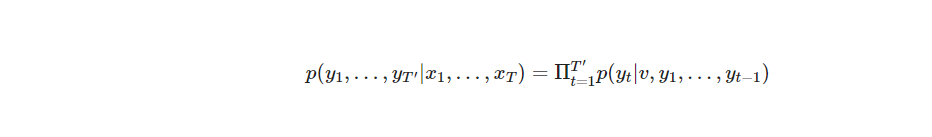

Encoder가 생성한 컨텍스트 벡터 v 를 Embedding 레이어를 거친 y 값에 Concatnate하여 위 수식을 비로소 만족하게 됩니다. 우리가 Seq2seq를 완성한 거죠!

# 7-5. Attention! (1) Bahdanau Attention

혁신적이었던 Seq2Seq은 Encoder-Decoder 구조라는 딥러닝 모델의 큰 틀을 제시했고, 지금까지도 그 구조는 널리 활용되고 있습니다. 하지만 그것만으로 기계 번역이 완벽했다면 우리는 이미 외국어에 대한 두려움이 사라졌겠죠?

Seq2Seq 역시 여느 기법처럼 한계점이 존재했으며 이를 발전시키려는 시도가 아주 많았습니다. 가장 대표적인 방법이 바로 Attention 메커니즘입니다! 이번 스텝에서는 Attention 메커니즘의 이모저모를 살펴보자

1. Bahdanau Attention

Bahdanau는 seq2seq의 컨텍스트 벡터가 고정된 길이로 정보를 압축하는 것이 손실을 야기한다고 주장하였다. 즉 짧은 문장에 대해서는 괜찮을지 모르겠으나 문장이 길어질수록 성능이 저하된다는 것이다.

이에 그느 Encoder의 최종 State 값만을 사용하는 기존의 방식이 아닌, 매 스텝의 Hidden State를 활용해 컨텍스트 벡터를 구축하는 어텐션 매커니즘을 제안한다.

아래는 Bahdanau Attention 논문이다. 반드시 읽어봐야 할 논문 중 하나이다. 나중에 반드시 읽어보자

[Bahdanau Attention 논문](https://arxiv.org/pdf/1409.0473.pdf)

[Bahdanau Attention 정리글](https://lovit.github.io/machine%20learning/2019/03/17/attention_in_nlp/)

Q11. 블로그 저자의 사견에 따르면 모델의 성능 향상 외에 Attention을 활용할 수 있는 방법이 하나 있습니다. 부산물이라고 표현된 그 방법은 무엇인가요?
- attention weight matrix를 이용하여 모델의 작동 방식에 대한 시각화는 모델의 안정성을 점검하고, 모델이 의도와 다르게 작동할 때 그 원인을 찾는데 이용될 수 있습니다. 

Q12. Sequence Labeling과 Sequence to Sequence의 예시를 하나씩 적고, 두 Task의 차이점에 대해 간단히 설명해봅시다
- Sequence Labeling : 품사 판별, 입력되는 단어열과 출력되는 품사열의 길이가 같습니다.
- Sequence to Sequence : 기계번역
- 차이점 : Labeling은 입력 단어열과 품사열의 길이가 같지만 seq2seq는 다를 수 있다.

2. seq2seq과 attn-seq2seq, 뭐가 다른가?

어텐션이 있고 없고는 다음과 같이 다르다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-attn.max-800x600.png)
<center></center>

위 두식에서 다른 점은 context vector c에 첨자 i가 다르다. 이런 차이가 발생한 이유는 다음가 같다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-attn_exp.max-800x600.png)
<center></center>

위 그림은 Bahdanau 논문 원문의 3.LEARNING TO ALIGN AND TRANSLATE의 내용을 바탕으로 재구성한 것입니다. 위 그림의 왼쪽 부분은 X_j를 입력으로, y_i를 출력으로 하는 인코더-디코더 부분을 도식화한 것입니다. 여기서 유의해야 할 점은 ii는 디코더의 인덱스, jj는 인코더의 인덱스라는 점입니다.

그렇다면 context vector c에 첨자 i가 붙는다는 의미는 다음과 같다.

인코더가 X를 해석한 context c_i는 디코더의 포지션 i에 따라 다르게 표현(represent)되어야 한다.

seq2seq의 인코더가 해석한 context는 디코더의 포지션i에 무관하게 항상 일정했다. 그러나 attention이 더해지면서 달라진다.

'나는 밥을 먹었다'라는 한글 문장을 'I ate food'로 번역한다고 가정한다. 영어 단어의 첫 단어 'I'를 만들어야 할 때 인코더가 한글 문장을 해석한 컨텍스트 벡터에서는 '나는'이 강조되어야 하고, 영어 문장의 세 번째 'lunch'를 만들어야 할 때 인코더의 컨텍스트 벡터에서는 '밥을'이 강조되어야 한다는 것이다.

디코더가 현재 시점 i에서 보기에 인코더의 어느 부분 j가 중요한가? 이 가중치가 바로 attention인 것이다.

얼마나 강조되어야 하는지를 나타내는 가중치를 계산하는 식은 다음과 같다. 위의 식에서 αij가 바로 인코더의 j번째 hidden state h_j가 얼마나 강조되어야 할지를 결정하는 가중치 역할을 합니다. 이 가중치는 다시 디코더의 직전 스텝의 hidden state s 
i−1와 h_j의 유사도가 높을수록 높아지게 되어 있습니다.

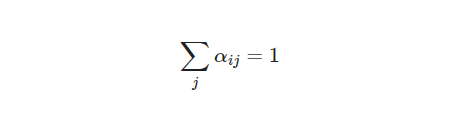

Q13. 가중치의 합이 1이 되는 위 식이 성립하는 것은 어떤 함수의 특성 때문인데요, 입력값을 확률값으로 변환해주는 그 함수는 무엇인가요?
- softmax

Attention이라는 기법이 어떤 의미를 가지는지 정리가 조금 되셨나요? 우리는 Bahdanau의 기법을 조금 더 알고 싶으니 그에 포커싱한 멋진 시각화 글을 소개해드립니다.

[Attn: Illustrated Attention](https://eda-ai-lab.tistory.com/157)

주의❗ 위 시각화 글의 1 단계 : 모든 인코더 hidden state의 점수 얻기 부분에서 두 Hidden State의 평가 함수에 내적을 사용했는데요. 일반적인 attention 설명을 위해 내적을 사용했을 뿐, Bahdanau attention에서 실제 평가 함수는 아래와 같이 특정 벡터 공간으로 매핑된 두 Hidden State의 합을 사용합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-9-1.max-800x600.png)
<center></center>

Q14. 위 시각화 글의 2단계에서, Softmax의 결괏값은 Encoder에 매 스텝마다 입력으로 들어온 각 단어의 독립적인 비중이라고 생각해도 좋은가요? (Hint: RNN의 Hidden State는 어떤 과정을 통해 생기죠?)
- 독립적이지 않다. RNN은 단어의 정보를 순차적으로 적립하여 Hidden State를 구축하기 때문에 순방향 RNN의 첫 단어는 그 단어의 정보만을 담았을지언정 그 이후 스텝들은 거쳐온 모든 단어의 정보를 포함하고 있다.

Q15. 위 시각화 글의 4단계에서, Hidden State에 Softmax 값을 곱하여 Alignment 값을 얻었습니다. 해당 값을 모두 더하여 최종적인 컨텍스트 벡터를 얻는데요, 다 더해지면 값이 모호해지지 않을까요? 이는 어떤 의미를 갖나요? 간단히 설명하고 기존 Seq2seq의 고정 크기의 컨텍스트 벡터와 비교해봅시다. (Hint: Word2Vec의 연산을 기억하나요?)
- 컨텍스트 벡터가 핵심 단어(비중이 큰 단어)에 가장 근접하게 다가서되, 주변 단어에도 각각의 비중만큼 영향을 받아 문장을 적합한 위치에 매핑되게 한다.

- 기존 RNN의 최종 스텝을 컨텍스트 벡터로 쓰던 방식은 항상 고정된 비중을 사용(마지막에 등장한 단어가 큰 비중)하는 셈이므로 Bahdanau의 방식보다 문맥 정보를 유연하게 반영하지 못한다.

Q16. Bahdanau 방식에서 생성된 컨텍스트 벡터는 어떤 방식으로 Decoder에서 사용되나요?
- Decoder의 이전 Hidden State와 Concatenate하여 새로운 Hidden State로 정의된다.

Bahdanau가 제안한 Attention은 하나의 Baseline이 되어 지금도 여러 기법을 시험하는 데에 멋진 중심점이 되어주고 있습니다. 멋진 기술들의 공통점은 구현한 것을 봤을 때도 이해가 정말 잘 된다는 것이죠! 여기까지의 개념설명이 명확히 와닿지 않았더라도, 구현을 살펴보며 복습을 해봅시다!


In [ ]:
# BahdanauAttention 구현

class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W_decoder = tf.keras.layers.Dense(units)
    self.W_encoder = tf.keras.layers.Dense(units)
    self.W_combine = tf.keras.layers.Dense(1)

  def call(self, H_encoder, H_decoder):
    print('[ H_encoder ] Shape : ',  H_encoder.shape)

    H_encoder = self.W_encoder(H_encoder)
    print("[ W_encoder X H_encoder ] Shape:", H_encoder.shape)

    print("\n[ H_decoder ] Shape:", H_decoder.shape)
    H_decoder = tf.expand_dims(H_decoder, 1)
    H_decoder = self.W_decoder(H_decoder)

    print("[ W_decoder X H_decoder ] Shape:", H_decoder.shape)
                               
    score = self.W_combine(tf.nn.tanh(H_decoder + H_encoder))
    print("[ Score_alignment ] Shape:", score.shape)

    attention_weights = tf.nn.softmax(score, axis=1)
    print("\n최종 Weight:\n", attention_weights.numpy())

    context_vector = attention_weights * H_decoder
    context_vector = tf.reduce_sum(context_vector, axis = 1)

    return context_vector, attention_weights

W_size = 100

print("Hidden State를 {0}차원으로 Mapping\n".format(W_size))

attention = BahdanauAttention(W_size)

enc_state = tf.random.uniform((1, 10, 512))
dec_state = tf.random.uniform((1, 512))

_ = attention(enc_state, dec_state)

Hidden State를 100차원으로 Mapping

[ H_encoder ] Shape :  (1, 10, 512)
[ W_encoder X H_encoder ] Shape: (1, 10, 100)

[ H_decoder ] Shape: (1, 512)
[ W_decoder X H_decoder ] Shape: (1, 1, 100)
[ Score_alignment ] Shape: (1, 10, 1)

최종 Weight:
 [[[0.11162146]
  [0.07901648]
  [0.07644609]
  [0.14229028]
  [0.11833052]
  [0.07512707]
  [0.1513459 ]
  [0.06177875]
  [0.07978389]
  [0.10425954]]]


Encoder의 모든 스텝에 대한 Hidden State를 100차원의 벡터 공간으로 매핑 (1, 10, 100) 하고, Decoder의 현재 스텝에 대한 Hidden State 역시 100차원의 벡터 공간으로 매핑 (1, 1, 100)해 두 State의 합으로 정의된 Score (1, 10, 1) 를 구하는 모습입니다. Softmax를 거쳐 나온 값은 0-1 사이의 값으로 각 단어가 차지하는 비중을 의미하겠죠? 예시에서는 랜덤한 값을 사용했기 때문에 비중이 비슷비슷하지만 실제 단어로 적용시켜보면 유사한 단어에 높은 비중을 할당하게 된답니다! 그것을 시각화하면 아래와 같은 그림을 보실 수 있습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-4-L-9.jpg)
<center>Attention Map]</center>

# 7-6. Attention! (2) Luong Attention

1. Luong Attention

Luong의 Attention은 Bahdanau의 방식을 약간 발전시킨 형태입니다. Decoder의 현재 Hidden State를 구하기 위해 한 스텝 이전의 Hidden State를 활용하는 것은 연산적으로 비효율적입니다. 이는 RNN의 연산 형태 때문인데, 자세한 내용은 아래 웹페이지에서 확인하시죠! 수식적인 부분은 완벽하게 이해하지 않아도 좋으니, Luong의 아이디어에 중점을 맞추도록 합니다.

[Luong Attention 개념 정리](https://hcnoh.github.io/2019-01-01-luong-attention)

Q17. 저자들은 4가지 Score 함수를 제시하였습니다. 각각은 무엇인가요?
- Dot, General, Concat, Location

[참고 논문](https://arxiv.org/pdf/1508.04025.pdf)

Q18. 4가지 Score 함수 중, 가장 합리적인 성능을 보이는 함수는 어떤 함수인가요?
- General

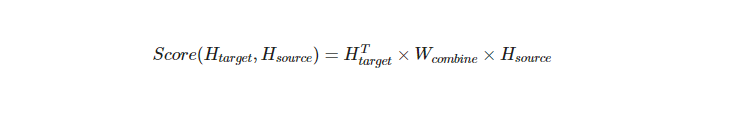



In [ ]:
# LuongAttention 구현

class LuongAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(LuongAttention, self).__init__()
    self.W_combine = tf.keras.layers.Dense(units)

  def call(self, H_encoder, H_decoder):
    print('[ H_encoder ] Shape : ', H_encoder.shape)

    WH = self.W_combine(H_encoder)
    print('[ W_encoder X H_encoder ] Shape : ', WH.shape)

    H_decoder = tf.expand_dims(H_decoder, 1)
    alignment = tf.matmul(WH, tf.transpose(H_decoder, [0, 2, 1]))
    print('[ Score_alignment ] Shape : ', alignment.shape)

    attention_weights = tf.nn.softmax(alignment, axis = 1)
    print("\n최종 Weight:\n", attention_weights.numpy())

    attention_weights = tf.squeeze(attention_weights, axis=-1)
    context_vector = tf.matmul(attention_weights, H_encoder)

    return context_vector, attention_weights

emb_dim = 512

attention = LuongAttention(emb_dim)

enc_state = tf.random.uniform((1, 10, emb_dim))
dec_state = tf.random.uniform((1, emb_dim))

_ = attention(enc_state, dec_state)



[ H_encoder ] Shape :  (1, 10, 512)
[ W_encoder X H_encoder ] Shape :  (1, 10, 512)
[ Score_alignment ] Shape :  (1, 10, 1)

최종 Weight:
 [[[3.9707996e-02]
  [8.0487800e-01]
  [4.7589329e-04]
  [1.5667065e-04]
  [2.1497888e-02]
  [1.4207237e-03]
  [1.2390356e-01]
  [3.7665704e-05]
  [4.1411652e-09]
  [7.9216221e-03]]]


Bahdanau의 Score 함수와는 다르게 하나의 Weight만을 사용하는 것이 특징입니다. 어떤 벡터 공간에 매핑해주는 과정이 없기 때문에 Weight의 크기는 단어 Embedding 크기와 동일해야 연산이 가능합니다. 이 또한 번역에 적용해보고 성능을 비교해본다면 좋겠죠!

# 7-7. 트랜스포머로 가기 전 징검다리?

Seq2seq와 Attention이 폭풍처럼 휩쓸고 난 후, 잠잠해진 NLP 계를 다시 깨운 것은 2016년 구글의 신경망 번역 시스템이었습니다. 놀라운 구조를 제안한 것은 아니나 무려 8개 층을 쌓은 Encoder-Decoder 구조와 Residual Connection은 제법 멋졌죠. 이에 대한 정리 글을 첨부하니 참고하라.

[Google's Neural Machine Translation System.](https://norman3.github.io/papers/docs/google_neural_machine_translation.html)

Q19. GNMT는 Attention을 활용한 Seq2seq 모델인데요, 여기서 Attention은 누구의 방식을 채택했나요? (우리가 배운 두 명 중 한 명이겠죠?)
- BahdanauAttention

Q20. Residual Connection을 사용했을 때의 이점이 몇 가지 있습니다. 가장 인상 깊게 느껴지는 두 가지만 적어봅시다.
- 정확도를 올릴 수 있다.
- 기존에 LSTM을 가지는 층 문제를 해소한다.
- 정확도가 올라간다.
- 학습 속도가 빨라진다.
- Gradient Exploding / Vanishing 문제를 해결한다

Q21. GNMT에서 언급되는 Copy Model이란 무엇인가요?
- 한 번도 본 적 없는 단어에 대해서 <UNK> 토큰 처리를 하지 않고 단어를 그대로 복사하여 적당한 위치에 배치하는 모델이다.

GNMT(Google Neural Machine Translation)는 어쩌면 복선이었을 수도 있는데, 왜냐하면 그 후에 등장한 것이 NLP의 꽃, 트랜스포머(Transformer) 이기 때문이죠! 앞서 언급한 레이어를 쌓는 구조나 Residual Connection이 트랜스포머와 굉장히 유사하기에 그렇게 느껴지기도 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-4-L-10.max-800x600.jpg)
<center> 트랜스포머의 구조</center>

트랜스포머의 Multi-Head Attention이라는 개념을 도입해 폭넓은 문맥을 파악하게 하고, 기존의 RNN 구조를 완전히 탈피하여 연산 속도 측면에서도 혁신적인 발전이 일어났습니다! 지금까지도 트랜스포머를 기반으로 한 모델들이 각 분야에서 최고의 성능을 내고있습니다.






# 7-8. 마무리

GD7에서 배운 내용

1. seq2seq

2. Attention
 - BahdanauAttention

 - LuongAttention

[ELECTRA 논문 리뷰](https://lms.aiffel.io/course/312/node/466/step/3123)



# 질문하고 싶었던 내용

